# Smart Loan Recovery System
---

## Business Objective:
 - A financial institution provides various types of loans and is facing challenges in loan recovery. The institution has observed a significant increase in delinquent loans, particularly borrowers who have missed multiple payments. The management wants to optimize the loan recovery process by identifying the best strategies based on borrower profiles, outstanding loan amounts, and past recovery outcomes.

 - Using historial data, the task is to develop a Loan Recovery Strategy Model that predicts each delinquent borrower's most effective recovery method to maximize the loan recovery while minimizing the costs.
---

### Below are the problems that needs to be solved:
1. Identify borrower segments based on attributes such as: Loan amount, monthly income, payment history and missed payments.
2. Optimize collection methods (eg: legal action, settlement offers, debt collectors, phone calls) to increase recovery rates.
3. Minimize recovery costs while maximizing the amount recovered.
4. Develop an early warning system to flag borrowers who are at high risk of default.

In [1]:
# Import required libraries:
import pandas as pd                                # Data manipulation and analysis
import numpy as np                                 # Numerical analysis

In [2]:
# Load the CSV data file using pandas:
df = pd.read_csv("../Dataset/loan-recovery.csv")              # Loaded and stored in variable df

# Preview the data:
df.head(5)                                         # Displays first 5 rows of the data

,Borrower_ID,Age,Gender,Employment_Type,Monthly_Income,Num_Dependents,Loan_ID,Loan_Amount,Loan_Tenure,Interest_Rate,...,Collateral_Value,Outstanding_Loan_Amount,Monthly_EMI,Payment_History,Num_Missed_Payments,Days_Past_Due,Recovery_Status,Collection_Attempts,Collection_Method,Legal_Action_Taken
0,BRW_1,59,Male,Salaried,215422,0,LN_1,1445796,60,12.39,...,1.727997e+06,2.914130e+05,4856.88,On-Time,0,0,Partially Recovered,1,Settlement Offer,No
1,BRW_2,49,Female,Salaried,60893,0,LN_2,1044620,12,13.47,...,1.180032e+06,6.652042e+05,55433.68,On-Time,0,0,Fully Recovered,2,Settlement Offer,No
2,BRW_3,35,Male,Salaried,116520,1,LN_3,1923410,72,7.74,...,2.622540e+06,1.031372e+06,14324.61,Delayed,2,124,Fully Recovered,2,Legal Notice,No
3,BRW_4,63,Female,Salaried,140818,2,LN_4,1811663,36,12.23,...,1.145493e+06,2.249739e+05,6249.28,On-Time,1,56,Fully Recovered,2,Calls,No
4,BRW_5,28,Male,Salaried,76272,1,LN_5,88578,48,16.13,...,0.000000e+00,3.918989e+04,816.46,On-Time,1,69,Fully Recovered,0,Debt Collectors,No


In [3]:
# Shape and Structure of the data:
structure = df.shape                               # Matrix is 500 X 21 meaning 500 rows and 21 columns
print(f'Structure of the data:\n{structure}')

Structure of the data:
(500, 21)


In [4]:
# Check information on the data:
information = df.info()                            # Provides range of information on columns and rows
print(information)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Borrower_ID              500 non-null    object 
 1   Age                      500 non-null    int64  
 2   Gender                   500 non-null    object 
 3   Employment_Type          500 non-null    object 
 4   Monthly_Income           500 non-null    int64  
 5   Num_Dependents           500 non-null    int64  
 6   Loan_ID                  500 non-null    object 
 7   Loan_Amount              500 non-null    int64  
 8   Loan_Tenure              500 non-null    int64  
 9   Interest_Rate            500 non-null    float64
 10  Loan_Type                500 non-null    object 
 11  Collateral_Value         500 non-null    float64
 12  Outstanding_Loan_Amount  500 non-null    float64
 13  Monthly_EMI              500 non-null    float64
 14  Payment_History          5

**The information range shows there are no missing values out of the whole 500 rows. Also, the datatypes of the columns are correct.**

In [5]:
# Check for duplicate rows:
duplicate_rows = df.duplicated().sum()
print(f'Number of duplicate rows:\n{duplicate_rows}')

Number of duplicate rows:
0


In [6]:
# Descriptive Statistics:
stats = df.describe()
stats.round(2).T

,count,mean,std,min,25%,50%,75%,max
Age,500.0,43.12,12.73,21.00,32.00,44.00,53.00,64.00
Monthly_Income,500.0,134829.92,68969.36,15207.00,76343.25,134929.50,193086.25,249746.00
Num_Dependents,500.0,1.48,1.15,0.00,0.00,1.00,3.00,3.00
Loan_Amount,500.0,1024907.03,590755.60,54138.00,462984.75,997124.00,1557952.25,1995325.00
Loan_Tenure,500.0,46.10,18.24,12.00,36.00,48.00,60.00,72.00
Interest_Rate,500.0,11.19,3.78,5.02,7.91,10.92,14.58,17.97
Collateral_Value,500.0,603224.02,745713.07,0.00,0.00,232768.40,1111106.06,2744395.14
Outstanding_Loan_Amount,500.0,562725.98,472358.06,15712.83,182207.20,413323.97,832478.70,1932395.92
Monthly_EMI,500.0,15861.54,18709.23,261.88,4039.10,9330.17,20439.48,127849.23
Num_Missed_Payments,500.0,1.91,2.11,0.00,1.00,2.00,3.00,12.00


### Described Data Insights:
- Age:
  Borrowers range from 21 to 64 years, indicating a mix of young professionals and mature borrowers.
  Average age is 43, showing a mid-career dominant borrower base.

- Monthly_Income:
  Average monthly income is $1.34L, with a minimum of $15.2K reflecting freshers or entry-level earners.
  Income distribution likely skewed by some high earners.

- Num_Dependents:
  Borrowers support on average 1-2 dependents, with a maximum of 3,
  potentially influencing repayment capacity due to family burden.

- Loan_Amount:
  Loan amounts vary widely from $54K to nearly $20L, averaging about $10L.
  Large spread indicates presence of high-value loans requiring separate risk assessment.

- Loan_Tenure:
  Ranges between 12 to 72 months (1 to 6 years), averaging ~46 months (~4 years).
  Longer tenures may ease EMI stress but increase total interest.

- Interest_Rate:
  Average rate is 11.19%, spanning 5% to nearly 18%.
  Higher rates might reflect riskier borrowers or specific loan products.

- Collateral_Value:
  Many loans have zero collateral, indicating unsecured lending for a significant share.
  Collateral values where present can be very high (up to $27.4L), possibly mitigating lender risk.

- Outstanding_Loan_Amount:
  Average unpaid balance is $5.6L, with some loans having very high outstanding amounts (~$19.3L),
  highlighting potential recovery challenges.

- Monthly_EMI:
  EMI payments range widely ($262 to $1.27L),
  suggesting payment stress for some borrowers relative to income.

- Num_Missed_Payments:
  Average missed payments is ~2, but distribution shows loyal borrowers (0 missed) and chronic defaulters (up to 12 missed).

- Days_Past_Due:
  Average overdue duration is ~70 days (~2+ months),
  with wide variance suggesting prioritization by overdue days could improve collection efficiency.

- Collection_Attempts:
  Agencies make up to 10 recovery attempts per borrower, averaging 3.
  Analyzing effectiveness of these attempts can optimize resource allocation.

# EDA:
 - Visualize distributions: Loan amounts, income, missed payments.
 - Analyze correlations (collateral vs recovery).
 - Check class balance for target variable (Collection_Method).
 - Segment borrowers (clustering) by risk and loan profile.

---

## Analyzing Data Distribution and Relationships:

In [7]:
# Import Plotly's graph_objects module for low-level graphing and express module for quick plotting
import plotly.graph_objects as go
import plotly.express as px

# Import pandas library for data manipulation and analysis
import pandas as pd

# Create a histogram of 'Loan_Amount' from the dataframe 'df'
# nbins=30 sets the number of bins (bars) in the histogram
# marginal='violin' adds a violin plot showing data distribution shape
# opacity=0.7 makes bars slightly transparent for visual clarity
# title sets the chart title
# labels provide friendly axis labels for 'Loan_Amount' and 'Monthly_Income'
# color_discrete_sequence defines the color of the histogram bars as royal blue
fig = px.histogram(
    df, 
    x='Loan_Amount', 
    nbins=30, 
    marginal='violin', 
    opacity=0.7,
    title='Loan Amount Distribution & Relationship with Monthly Income',
    labels={'Loan_Amount': 'Loan Amount (in ₹)', 'Monthly_Income': 'Monthly Income'}, 
    color_discrete_sequence=['royalblue']
)

# Add a red density curve line on top of the histogram to visualize the probability density function
fig.add_trace(go.Scatter(
    x=sorted(df['Loan_Amount']),  # X values sorted loan amounts for a smooth curve
    y=px.histogram(df, x='Loan_Amount', nbins=30, histnorm='probability density').data[0]['y'],  
    # Y values come from normalized histogram (probability density), extracted from px.histogram trace
    mode='lines',  # Draw as a continuous line, no markers
    name='Density Curve',  # Legend label
    line=dict(color='red', width=2)  # Line styling: red color, width of 2
))

# Create a scatter plot showing relationship between Loan_Amount and Monthly_Income
# Points are colored by Loan_Amount using the 'viridis' continuous color scale
# Size of points is proportional to Loan_Amount to show magnitude visually
# hover_name shows the dataframe index when hovering over points
scatter = px.scatter(
    df, 
    x='Loan_Amount', 
    y='Monthly_Income',
    color='Loan_Amount', 
    color_continuous_scale='viridis',
    size=df['Loan_Amount'], 
    hover_name=df.index
)

# Add all traces from scatter plot into the original figure (fig)
# This overlays the scatter plot on top of the histogram + density curve
for trace in scatter.data:
    fig.add_trace(trace)

# Update layout of the figure to add annotation, axis titles, template, and legend
fig.update_layout(
    annotations=[  # Add an annotation (text box with arrow)
        dict(
            x=max(df['Loan_Amount']) * 0.8,  # X position at 80% of max loan amount
            y=max(df['Monthly_Income']),    # Y position at max monthly income
            text='Higher Loan Amounts are linked to Higher Income Levels',  # Annotation text
            showarrow=True,  # Show arrow pointing to the annotation position
            arrowhead=2,     # Style of the arrowhead
            font=dict(size=12, color='red')  # Font size and color of annotation text
        )
    ],
    xaxis_title='Loan Amount(in ₹)',  # X-axis label
    yaxis_title='Monthly_Income(in ₹)',  # Y-axis label
    template='plotly_white',  # Use a clean white theme for the plot background
    showlegend=True  # Display legend for all traces
)

# Render and display the final combined interactive figure
fig.show()

### Insights:
- The plot shows a positive relationship between Loan Amounts and Monthly Income, indicating that individuals with higher income levels tend to secure larger loans.
- The density curve at the top shows the distribution of loan amounts, emphasizing that higher loan amounts are more frequent among higher income brackets.
- It highlights the proportionality between income and loan size, which shows an income-based approach in loan approvals or customer profiling.

## Analyzing Payment History with Recovery Status:

In [8]:
# Create a grouped histogram showing how different payment history categories affect loan recovery status
fig = px.histogram(
    df,  # Data source: your dataframe
    x='Payment_History',  # X-axis: categories representing borrower payment behavior
    color='Recovery_Status',  # Different bars grouped/colored by whether the loan was recovered or not
    barmode='group',  # Bars for each category are placed side-by-side for direct comparison (grouped instead of stacked)
    title='How Payment history affects Loan Recovery status.',  # Chart title
    labels={
        'Payment_History': 'Payment History',  # Rename axis label for clarity
        'count': 'Number of Loans'  # Customize the Y-axis label (default is just "count")
    },
    color_discrete_map={
        'Recovered': 'green',         # Assign 'Recovered' bars the color green
        'Not Recovered': 'red'        # Assign 'Not Recovered' bars the color red
    },
    text_auto=True                    # Show count labels on each bar
)

# Update layout for better aesthetics and interpretation
fig.update_layout(
    xaxis_title='Payment History',  # X-axis label
    yaxis_title='Number of Loans',  # Y-axis label
    legend_title='Recovery_Status',  # Title for the legend to explain colors
    template='plotly_white'  # Use a clean white background theme
)

# Render the interactive plot in the notebook
fig.show()

### Insights:
- Loans with on-time payments are mostly fully recovered. Delayed payments result in mix of partial and full recoveries, with some written off.
- Missed payments have a significantly lower recovery rate, with most loans ending up with either partially recovered or written off.

## Analyzing Loan Recovery based on Missed Payments:

In [9]:
df.columns

Index(['Borrower_ID', 'Age', 'Gender', 'Employment_Type', 'Monthly_Income',
       'Num_Dependents', 'Loan_ID', 'Loan_Amount', 'Loan_Tenure',
       'Interest_Rate', 'Loan_Type', 'Collateral_Value',
       'Outstanding_Loan_Amount', 'Monthly_EMI', 'Payment_History',
       'Num_Missed_Payments', 'Days_Past_Due', 'Recovery_Status',
       'Collection_Attempts', 'Collection_Method', 'Legal_Action_Taken'],
      dtype='object')

In [10]:
df['Recovery_Status'].value_counts()

Fully Recovered        296
Partially Recovered    154
Written Off             50
Name: Recovery_Status, dtype: int64

In [11]:
# Create a box plot to visualize the distribution of missed payments across different recovery status (outcomes)
fig = px.box(df, x='Recovery_Status',                                # X-axis represents the loan recovery status (Recovered, Not Recovered)
             y='Num_Missed_Payments',                                # y-axis represents the number of missed payments by the borrowers
             title='How Missed Payments affect Loan Recovery Status.',   # Plot title
             labels={'Recovery_Status':'Recovery Status',
                     'Num_Missed_Payments':'Number of Missed Payments'},
                     color='Recovery_Status',                            # Color code each box by recovery status
                     color_discrete_map={'Recovered':'green','Not Recovered':'red'},    # Manually map specific colors to specific statuses
            points='all', )                                             # Show all individual data points overlaid on the box plot

# Customize layout to improve readability and aesthetics
fig.update_layout(
    xaxis_title='Recovery Status',               # Label for X-axis
    yaxis_title='Number of Missed Payments',     # Label for Y-axis
    template='plotly_white'                      # White background
)

# Render the plot in the output cell
fig.show()

### Insights:
 - Fully recovered have a median of 2 missed payments suggesting the majority recovered even after some delays.
 - Recovery is possible with timely intervention

 - Partially recovered has a slightly higher median value between 2-3/
 - Has more variation in missed payments, goes as high as 12.
 - Can segment as at-risk borrowers who miss several payments and only partially repays.

 - Median is around 2-3 for recovery status : Written off, almost similar to others.
 - These loans don't always mean missed payments, some could be quick defaults, or due to lack of follow ups and/or wrong borrower profiling.

## Analyzing Loan Recovery based on Monthly Income:

In [12]:
# Create a scatterplot to analyze how monthly income and loan amount affect loan recovery status.

fig = px.scatter(df,x='Monthly_Income',                          # X-axis: Borrower's Income
                 y='Loan_Amount',                                # Y-axis: Loan amount taken
                 color='Recovery_Status',                        # Color points by recovery status(Recovered/Not Recovered)
                 size='Loan_Amount',                             # Bubble size reflects the magnitude of loan
                 hover_data={'Monthly_Income': True,             # # Show additional info on hover
                             'Loan_Amount': True,
                             'Recovery_Status': True},
                 title='How Monthly Income and Loan Amount affect Loan Recovery',
                 labels={'Monthly_Income': 'Monthly Income',
                         'Loan_Amount': 'Loan Amount'},
                color_discrete_map={'Recovered':'green',         # Manually map specific colors to status
                                    'Not Recovered':'red'})

# Add annotation at the top-right region to highlight an important insight
fig.add_annotation(
    x=max(df['Monthly_Income']),                     # Place annotation at max income
    y=max(df['Loan_Amount']),                        # Place annotation at max loan amount
    text='High loans may still get recovered if income is high',  # Key insight
    showarrow=True,                                  # Shows arrow
    arrowhead=2,                                     # Arrow style
    font=dict(size=12, color='red')                  # Style of annotation text
)

# Customize axis labels and background
fig.update_layout(
    xaxis_title='Monthly Income',         # X-axis Label
    yaxis_title='Loan Amount',            # Y-axis Label
    template='plotly_white'               # Background for clarity
)

# Display the plot
fig.show()

### Insights:
 - High income does indicate better recovery odds, as even the biggest loans are often fully recovered.
 - Low income leads to low-to-mid loan amounts which in turn shows a higher levels of Orange(Written-Off) and Green(Partially Recovered).
 - This suggests default is likely with borrowers having low income regardless of loan size.
 - The plot clearly shows that even for high loan amounts, a strong monthly income can act as a cushion to prevent defaults.

---

# Feature Engineering:
 - Engineering few new features based on existing ones to check whether they can upscale model performance.
 - Features such as EMI to Income ratio, Collateral Coverage and Default Severity.

In [13]:
# Display the data:
pd.set_option('display.max_columns',None)      # To display all the columns instead of an embedded placehoder '...'
df.head(15).round(2)                           # Shows first 15 rows with .2float for numerical values

,Borrower_ID,Age,Gender,Employment_Type,Monthly_Income,Num_Dependents,Loan_ID,Loan_Amount,Loan_Tenure,Interest_Rate,Loan_Type,Collateral_Value,Outstanding_Loan_Amount,Monthly_EMI,Payment_History,Num_Missed_Payments,Days_Past_Due,Recovery_Status,Collection_Attempts,Collection_Method,Legal_Action_Taken
0,BRW_1,59,Male,Salaried,215422,0,LN_1,1445796,60,12.39,Home,1727997.26,291413.01,4856.88,On-Time,0,0,Partially Recovered,1,Settlement Offer,No
1,BRW_2,49,Female,Salaried,60893,0,LN_2,1044620,12,13.47,Auto,1180032.36,665204.15,55433.68,On-Time,0,0,Fully Recovered,2,Settlement Offer,No
2,BRW_3,35,Male,Salaried,116520,1,LN_3,1923410,72,7.74,Home,2622539.93,1031372.00,14324.61,Delayed,2,124,Fully Recovered,2,Legal Notice,No
3,BRW_4,63,Female,Salaried,140818,2,LN_4,1811663,36,12.23,Home,1145492.68,224973.92,6249.28,On-Time,1,56,Fully Recovered,2,Calls,No
4,BRW_5,28,Male,Salaried,76272,1,LN_5,88578,48,16.13,Personal,0.00,39189.89,816.46,On-Time,1,69,Fully Recovered,0,Debt Collectors,No
5,BRW_6,41,Male,Salaried,238224,3,LN_6,664741,36,15.86,Auto,982214.63,129965.53,3610.15,On-Time,1,111,Partially Recovered,6,Legal Notice,No
6,BRW_7,59,Female,Self-Employed,82649,1,LN_7,1514110,60,17.06,Home,1639218.86,875490.42,14591.51,On-Time,0,0,Partially Recovered,8,Debt Collectors,No
7,BRW_8,39,Male,Salaried,79674,0,LN_8,912147,12,9.76,Personal,0.00,416121.38,34676.78,Delayed,0,0,Fully Recovered,0,Settlement Offer,No
8,BRW_9,43,Male,Self-Employed,159832,3,LN_9,258859,72,9.13,Home,387116.94,168733.80,2343.53,On-Time,3,124,Fully Recovered,3,Settlement Offer,No
9,BRW_10,31,Male,Self-Employed,167999,0,LN_10,161435,60,14.74,Personal,0.00,133190.65,2219.84,Delayed,0,0,Partially Recovered,6,Legal Notice,No


In [14]:
# Engineering new features onto a copy of this dataset:
df_1 = df.copy()     # copies the dataframe in df_1

# Preview the new dataframe:
df_1.head()

,Borrower_ID,Age,Gender,Employment_Type,Monthly_Income,Num_Dependents,Loan_ID,Loan_Amount,Loan_Tenure,Interest_Rate,Loan_Type,Collateral_Value,Outstanding_Loan_Amount,Monthly_EMI,Payment_History,Num_Missed_Payments,Days_Past_Due,Recovery_Status,Collection_Attempts,Collection_Method,Legal_Action_Taken
0,BRW_1,59,Male,Salaried,215422,0,LN_1,1445796,60,12.39,Home,1.727997e+06,2.914130e+05,4856.88,On-Time,0,0,Partially Recovered,1,Settlement Offer,No
1,BRW_2,49,Female,Salaried,60893,0,LN_2,1044620,12,13.47,Auto,1.180032e+06,6.652042e+05,55433.68,On-Time,0,0,Fully Recovered,2,Settlement Offer,No
2,BRW_3,35,Male,Salaried,116520,1,LN_3,1923410,72,7.74,Home,2.622540e+06,1.031372e+06,14324.61,Delayed,2,124,Fully Recovered,2,Legal Notice,No
3,BRW_4,63,Female,Salaried,140818,2,LN_4,1811663,36,12.23,Home,1.145493e+06,2.249739e+05,6249.28,On-Time,1,56,Fully Recovered,2,Calls,No
4,BRW_5,28,Male,Salaried,76272,1,LN_5,88578,48,16.13,Personal,0.000000e+00,3.918989e+04,816.46,On-Time,1,69,Fully Recovered,0,Debt Collectors,No


### Engneering new features in DataFrame_1 => df_1:

#### EMI to Income Ratio:
  - Measures the repayment burden of a borrower
  - Indicates how much of their monthly income goes into their EMI payments.
---
  - It matters if this ratio > 0.4, the borrower is in a debt stress zone.
  - Lower ratio => Better affordability => Higher Change of Recovery.

In [15]:
# EMI_to_Income_Ratio:
df_1['EMI_to_Income_Ratio'] = df_1['Monthly_EMI'] / df['Monthly_Income']

In [16]:
# Display the new feature:
df_1['EMI_to_Income_Ratio']

0      0.022546
1      0.910346
2      0.122937
3      0.044378
4      0.010705
         ...   
495    0.023114
496    0.021715
497    0.060385
498    0.411755
499    0.390347
Name: EMI_to_Income_Ratio, Length: 500, dtype: float64

#### Collateral Coverage:
  - Measures how well the loan is secured by the pledged collateral.
  - High coverage = More fallback value for the lender if default happens.
---
  - If collateral coverage < 1 => Collateral is less than loan amount => Higher risk.
  - If collateral coverage > 1 => Considered Safe zone, lender can recover money even on default. 

In [17]:
# Collateral Coverage:
df_1['Collateral_Coverage'] = df_1['Collateral_Value'] / df_1['Loan_Amount']

# Display the feature:
df_1['Collateral_Coverage']

0      1.195187
1      1.129628
2      1.363485
3      0.632288
4      0.000000
         ...   
495    0.000000
496    0.000000
497    0.000000
498    0.719126
499    0.000000
Name: Collateral_Coverage, Length: 500, dtype: float64

#### Default Severity:
  - A Custom metric that quantifies how bad the default is.
  - Combines frequency and extent of delay.
---
  - A borrower who missed 5 payments each delayed by 60 days = 300 Severity.
  - Useful for prioritizing which defaults to recover first.
  - The higher the severity -> The more resource-intensive recovery needed. 

In [18]:
# Default Severity:
df_1['Default_Severity'] = df_1['Num_Missed_Payments'] * df_1['Days_Past_Due']

# Display the feature:
df_1['Default_Severity']

0        0
1        0
2      248
3       56
4       69
      ... 
495    338
496    204
497    420
498     27
499    116
Name: Default_Severity, Length: 500, dtype: int64

In [19]:
# An Example of the filtered values showing borrowers with various risk and factors:
df_1[
    (df_1['EMI_to_Income_Ratio'] > 0.5) &        # Moderate to high loan burden
    (df_1['Collateral_Coverage'] < 1) &         # Collateral not enough to cover loan
    (df_1['Default_Severity'] > 250)            # Multiple missed payments + large delays
]

,Borrower_ID,Age,Gender,Employment_Type,Monthly_Income,Num_Dependents,Loan_ID,Loan_Amount,Loan_Tenure,Interest_Rate,Loan_Type,Collateral_Value,Outstanding_Loan_Amount,Monthly_EMI,Payment_History,Num_Missed_Payments,Days_Past_Due,Recovery_Status,Collection_Attempts,Collection_Method,Legal_Action_Taken,EMI_to_Income_Ratio,Collateral_Coverage,Default_Severity
28,BRW_29,45,Female,Salaried,152348,1,LN_29,1581064,12,9.42,Home,8.903444e+05,1.155409e+06,96284.05,On-Time,2,144,Fully Recovered,2,Debt Collectors,No,0.632001,0.563130,288
90,BRW_91,44,Female,Salaried,21570,1,LN_91,1838380,72,9.62,Personal,0.000000e+00,1.529225e+06,21239.24,On-Time,3,94,Fully Recovered,3,Settlement Offer,No,0.984666,0.000000,282
104,BRW_105,61,Female,Salaried,150542,2,LN_105,1190844,12,15.14,Personal,0.000000e+00,1.015521e+06,84626.74,Delayed,3,147,Written Off,10,Legal Notice,No,0.562147,0.000000,441
148,BRW_149,49,Male,Salaried,20704,3,LN_149,426047,12,12.35,Personal,0.000000e+00,4.234646e+05,35288.72,Missed,12,92,Fully Recovered,2,Calls,No,1.704440,0.000000,1104
179,BRW_180,57,Female,Salaried,18726,0,LN_180,873759,72,5.61,Auto,8.109839e+05,7.565501e+05,10507.64,On-Time,3,145,Fully Recovered,3,Calls,No,0.561126,0.928155,435
349,BRW_350,62,Female,Salaried,22421,0,LN_350,1701377,12,6.07,Personal,0.000000e+00,1.372451e+06,114370.94,Delayed,2,152,Partially Recovered,9,Settlement Offer,No,5.101063,0.000000,304
383,BRW_384,42,Female,Business Owner,31456,3,LN_384,1464718,36,12.83,Personal,0.000000e+00,9.508604e+05,26412.79,Delayed,2,141,Partially Recovered,9,Settlement Offer,No,0.839674,0.000000,282
463,BRW_464,36,Female,Business Owner,24715,0,LN_464,1892360,60,10.99,Business,1.512435e+06,1.516592e+06,25276.53,Missed,4,147,Fully Recovered,2,Debt Collectors,No,1.022720,0.799232,588


### Summary Insights: Borrower Risk Analysis
 - 1. EMI Burden vs Income:
     Majority (>4/6) borrowers have a high EMI-to-Income ratio (>0.5), with one extreme case at 5.1x income (BRW_350) - extremely risky.
     BRW_149 is in the red zone with 170% EMI burden, which practically consumes double the income.

 - 2. Collateral Coverage:
     5 out of 6 borrowers have zero or insufficient collateral (Coverage < 1), weakening the lender's recovery leverage.
     Only BRW_180 shows a near-safe collateral ratio (0.92), offering partial financial backing.

 - 3. Default Severity:
     Default severity (missed payments x days past due) is consistently high, especially:
     BRW_149: 1104 - highest risk, 12 missed payments!
     Others hover above 250, with significant repayment delays.

 - 4. Recovery Outcomes:
     Surprisingly, even with weak collateral & high EMI burden:
     4 fully recovered, 1 partially, only 1 written off (BRW_105).
     Points to effective collection (Debt Collectors, Calls, Settlement Offers).

 - However, legal actions were not initiated in most - possibly a missed lever.
 ---

# Correlation Heatmaps and VIF Scores:
 - Useful to understand features of a dataset.
 - Helps in avoiding multicollinearity between features.


C:\Users\USER\AppData\Local\Temp\ipykernel_4160\1702087822.py:6: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



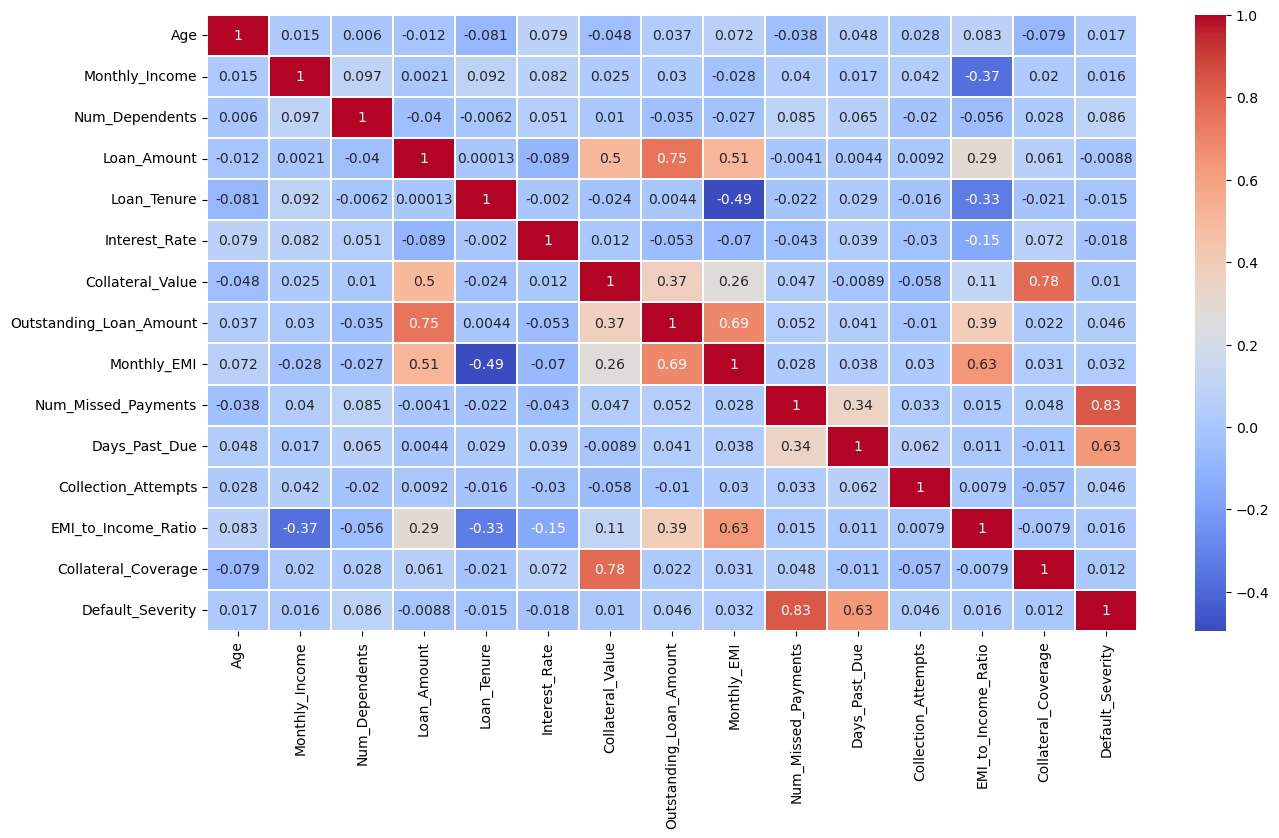

In [20]:
# 📦 Importing necessary libraries for data visualization
import matplotlib.pyplot as plt           # For plotting graphs
import seaborn as sns                     # For creating attractive and informative statistical plots

# 📈 Calculating the correlation matrix for numerical features in df_1
df_1_corr = df_1.corr()                   # Computes pairwise correlation of numeric columns

# 📊 Creating a heatmap to visualize correlations
plt.figure(figsize=(15,8))              # Set the size of the entire plot (12x12 inches)
sns.heatmap(df_1_corr,                   # Pass the correlation matrix
            cmap='coolwarm',             # Color palette: cool = negative correlation, warm = positive
            annot=True,                  # Display the correlation values inside the boxes
            linewidths=0.2)              # Line thickness between boxes
plt.show()                               # Render the heatmap

### Key Insights & TakeAways:
- High Positive Correlation:
  - 1. Loan Amount & Outstanding Loan Amount => 0.75
      - Naturally expected, as larger loans often have larger outstanding balances.
  - 2. Loan Amount & Collateral Value => 0.50
      - Higher loans tend to require more collateral, helps in risk mitigation strategies.
  - 3. Monthly EMI & Loan Amount => 0.51
      - Bigger loans typically lead to bigger EMI's.
  - 4. Number of Missed Payments & Default Severity => 0.83
      - Strongly correlated showing more missed payments can lead to greater default severity.
  - 5. Days Past Due & Default Severity => 0.63
      - Longer delays could possibly lead to higher rate of default.
  - 6. Monthly EMI & EMI to Income Ratio => 0.63
      - Higher EMI's relative to income stresses the borrower's repayment capacity.
- High Negative Correlation:
  - Monthly Income & EMI to Income Ratio => -0.37
      - As expected, higher income reduces the EMI burden ratio.
  - Loan Tenure & Monthly EMI => -0.49
      - Longer tenures reduces monthly EMI.

#### Selecing Features:


In [21]:
df_1.columns

Index(['Borrower_ID', 'Age', 'Gender', 'Employment_Type', 'Monthly_Income',
       'Num_Dependents', 'Loan_ID', 'Loan_Amount', 'Loan_Tenure',
       'Interest_Rate', 'Loan_Type', 'Collateral_Value',
       'Outstanding_Loan_Amount', 'Monthly_EMI', 'Payment_History',
       'Num_Missed_Payments', 'Days_Past_Due', 'Recovery_Status',
       'Collection_Attempts', 'Collection_Method', 'Legal_Action_Taken',
       'EMI_to_Income_Ratio', 'Collateral_Coverage', 'Default_Severity'],
      dtype='object')

In [22]:
# Define the features:
features = ['Age','Monthly_Income','Num_Dependents','Loan_Tenure','Interest_Rate','Outstanding_Loan_Amount','Collection_Attempts',
            'EMI_to_Income_Ratio','Collateral_Coverage','Default_Severity']

# Finalize the data:
df_1 = df_1[features]

# Preview the data:
df_1.head(10)

,Age,Monthly_Income,Num_Dependents,Loan_Tenure,Interest_Rate,Outstanding_Loan_Amount,Collection_Attempts,EMI_to_Income_Ratio,Collateral_Coverage,Default_Severity
0,59,215422,0,60,12.39,2.914130e+05,1,0.022546,1.195187,0
1,49,60893,0,12,13.47,6.652042e+05,2,0.910346,1.129628,0
2,35,116520,1,72,7.74,1.031372e+06,2,0.122937,1.363485,248
3,63,140818,2,36,12.23,2.249739e+05,2,0.044378,0.632288,56
4,28,76272,1,48,16.13,3.918989e+04,0,0.010705,0.000000,69
5,41,238224,3,36,15.86,1.299655e+05,6,0.015154,1.477590,111
6,59,82649,1,60,17.06,8.754904e+05,8,0.176548,1.082629,0
7,39,79674,0,12,9.76,4.161214e+05,0,0.435233,0.000000,0
8,43,159832,3,72,9.13,1.687338e+05,3,0.014662,1.495474,372
9,31,167999,0,60,14.74,1.331907e+05,6,0.013213,0.000000,0


# K-Means Clustering for creating Borrower Segments:

In [23]:
# Importing essential libraries:
import pandas as pd                      # For data manipulation and analysis
import numpy as np                       # For numerical operations and array handling
from sklearn.model_selection import train_test_split  # To split data into training and testing sets
from sklearn.preprocessing import StandardScaler      # For standardizing features (zero mean, unit variance)

# Splitting the dataset into training and testing sets:
train_data, test_data = train_test_split(
    df_1,                 # The full preprocessed dataset
    test_size=0.3,        # Reserve 30% of data for testing, 70% for training
    random_state=42       # Ensures reproducibility of the split (consistent results each run)
)

#### Scale Features:

In [24]:
# Import StandardScaler for feature normalization:
from sklearn.preprocessing import StandardScaler

# Define the list of features to scale for clustering or model input:
cluster_features = [
    'Age',
    'Monthly_Income',
    'Num_Dependents',
    'Loan_Tenure',
    'Interest_Rate',
    'Outstanding_Loan_Amount',
    'Collection_Attempts',
    'EMI_to_Income_Ratio',
    'Collateral_Coverage',
    'Default_Severity'
]

# Initialize the StandardScaler:
scaler = StandardScaler()

# Fit the scaler on training data and transform it:
train_scaled = scaler.fit_transform(train_data[cluster_features])

#### Apply K-Means for Clustering:

In [25]:
# Apply KMeans only on Train Data:
from sklearn.cluster import KMeans
# Initialize the KMeans clustering model:
kmeans = KMeans(n_clusters=4,                # Number of clusters to form (based on domain knowledge)
                random_state=42,             # Ensures reproducible clustering results
                n_init=10)                   # Number of time the algorithm will be run with different centroid seeds

# Fit the model on scaled training features and assign cluster labels:
train_data['Borrower_Segment'] = kmeans.fit_predict(train_scaled)

In [26]:
# Scale the test data using the same scaler fitted on training data:
test_scaled = scaler.transform(test_data[cluster_features])

# Predict the cluster labels (segments) for the test data:
# It assigns each test data point to the nearest cluster centroid found during training
test_data['Borrower_Segment'] = kmeans.predict(test_scaled)

#### Using Average Groupby Function to assist with Segment Names:

In [27]:
# Analyze cluster characteristics to assign meaningful labels (segment names)
segmented = train_data.groupby('Borrower_Segment')[
    ['Age', 'Monthly_Income', 'Num_Dependents', 'Loan_Tenure',
     'Interest_Rate', 'Outstanding_Loan_Amount', 'Collection_Attempts',
     'EMI_to_Income_Ratio', 'Collateral_Coverage', 'Default_Severity']
].mean().round(2)

# View the segment summary
print(segmented)

                    Age  Monthly_Income  Num_Dependents  Loan_Tenure  \
Borrower_Segment                                                       
0                 47.08        73250.20            1.18        22.80   
1                 46.24       145431.68            1.29        52.68   
2                 42.91       138904.09            1.70        48.00   
3                 39.42       145315.12            1.55        44.61   

                  Interest_Rate  Outstanding_Loan_Amount  Collection_Attempts  \
Borrower_Segment                                                                
0                          9.53                935528.04                 2.92   
1                         10.90                485979.66                 2.87   
2                         10.29                913970.65                 3.28   
3                         11.72                414979.42                 2.79   

                  EMI_to_Income_Ratio  Collateral_Coverage  Default_Severity  
B

In [28]:
# Define a mapping from numerical cluster labels to human-readable segment names:
segment_mapping = {
    0: 'Low Income, High EMI Burden Borrowers',
    1: 'Affluent, Low Risk Borrowers',
    2: 'High Income, High Default Risk Borrowers',
    3: 'Secured, Moderate Risk Borrowers'
}

# Apply the segment mapping to both Train and Test datasets:
train_data['Segment_Name'] = train_data['Borrower_Segment'].map(segment_mapping)
test_data['Segment_Name'] = test_data['Borrower_Segment'].map(segment_mapping)

### Building an Early Detection System for Loan Defaults based on the Risk Scores (High Risk Flag)

In [29]:
# Define high-risk segments based on updated segment labels
high_risk_segments = [
    'Low Income, High EMI Burden Borrowers',
    'High Income, High Default Risk Borrowers'
]

# Apply the correct high-risk flag mapping
train_data['High_Risk_Flag'] = train_data['Segment_Name'].apply(lambda x: 1 if x in high_risk_segments else 0)
test_data['High_Risk_Flag'] = test_data['Segment_Name'].apply(lambda x: 1 if x in high_risk_segments else 0)

### Model Building Stage: Training the Model

In [30]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Final feature set (after multicollinearity cleanup)
features = [
    'Age',
    'Monthly_Income',
    'Num_Dependents',
    'Loan_Tenure',
    'Interest_Rate',
    'Outstanding_Loan_Amount',
    'Collection_Attempts',
    'EMI_to_Income_Ratio',
    'Collateral_Coverage',
    'Default_Severity'
]

# Feature & target
X = train_data[features]
y = train_data['High_Risk_Flag']

# Train-test split (Stratified for class balance)
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize XGBoost Classifier
xgb = XGBClassifier(random_state=42, eval_metric='logloss')

# Fit model
xgb.fit(X_train, y_train)

# Evaluate
y_pred = xgb.predict(X_valid)
print(classification_report(y_valid, y_pred))
print(confusion_matrix(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94        53
           1       0.76      0.94      0.84        17

    accuracy                           0.91        70
   macro avg       0.87      0.92      0.89        70
weighted avg       0.93      0.91      0.92        70

[[48  5]
 [ 1 16]]


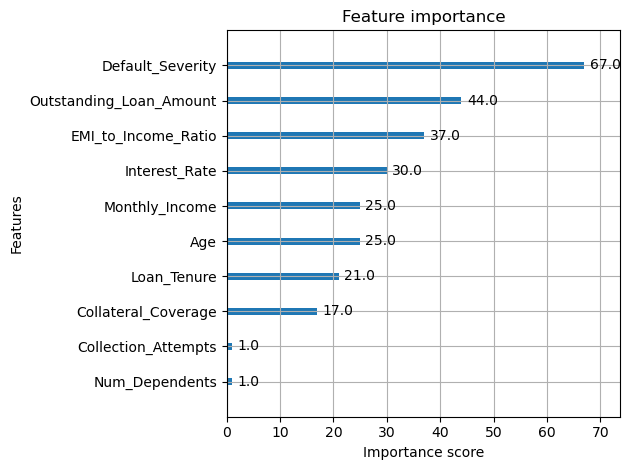

In [31]:
# Feature importance:

import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(xgb, max_num_features=10)
plt.tight_layout()
plt.show()

In [32]:
# Ensure you're using the same cleaned feature set used in training
features = [
    'Age',
    'Monthly_Income',
    'Num_Dependents',
    'Loan_Tenure',
    'Interest_Rate',
    'Outstanding_Loan_Amount',
    'Collection_Attempts',
    'EMI_to_Income_Ratio',
    'Collateral_Coverage',
    'Default_Severity'
]

# Predict risk scores (probabilities) for each test borrower
test_data['Predicted_Risk_Score'] = xgb.predict_proba(test_data[features])[:, 1]

# Optional: View a few examples
print(test_data[['Segment_Name', 'High_Risk_Flag', 'Predicted_Risk_Score']].head())

                              Segment_Name  High_Risk_Flag  \
361           Affluent, Low Risk Borrowers               0   
73            Affluent, Low Risk Borrowers               0   
374       Secured, Moderate Risk Borrowers               0   
155  Low Income, High EMI Burden Borrowers               1   
104  Low Income, High EMI Burden Borrowers               1   

     Predicted_Risk_Score  
361              0.039187  
73               0.000387  
374              0.000129  
155              0.993621  
104              0.986704  


In [33]:
# Grabs the first 5 rows of your test set for quick inspection.
# Rounds all numeric columns to 2 decimal places for better readability (great for presentations or debugging).
test_data.head(5).round(2)

,Age,Monthly_Income,Num_Dependents,Loan_Tenure,Interest_Rate,Outstanding_Loan_Amount,Collection_Attempts,EMI_to_Income_Ratio,Collateral_Coverage,Default_Severity,Borrower_Segment,Segment_Name,High_Risk_Flag,Predicted_Risk_Score
361,55,141888,0,72,17.81,1475467.28,2,0.14,0.91,234,1,"Affluent, Low Risk Borrowers",0,0.04
73,28,79178,3,72,6.39,381265.68,3,0.07,0.00,14,1,"Affluent, Low Risk Borrowers",0,0.00
374,35,237374,0,36,12.84,627915.17,0,0.07,1.23,0,3,"Secured, Moderate Risk Borrowers",0,0.00
155,22,133516,3,24,7.66,1374050.88,2,0.43,0.00,166,0,"Low Income, High EMI Burden Borrowers",1,0.99
104,61,150542,2,12,15.14,1015520.85,10,0.56,0.00,441,0,"Low Income, High EMI Burden Borrowers",1,0.99


## Evaluate the Model:

In [34]:
# Corrected feature list
features = [
    'Age',
    'Monthly_Income',
    'Num_Dependents',
    'Loan_Tenure',
    'Interest_Rate',
    'Outstanding_Loan_Amount',
    'Collection_Attempts',
    'EMI_to_Income_Ratio',
    'Collateral_Coverage',
    'Default_Severity'
]

# Predict labels
test_data['Predicted_High_Risk'] = xgb.predict(test_data[features])

# Import evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Evaluation Results
print("Confusion Matrix:\n", confusion_matrix(test_data['High_Risk_Flag'], test_data['Predicted_High_Risk']))

print("\nClassification Report:\n", classification_report(test_data['High_Risk_Flag'], test_data['Predicted_High_Risk']))

print("\nROC AUC Score:", roc_auc_score(test_data['High_Risk_Flag'], test_data['Predicted_Risk_Score']))

Confusion Matrix:
 [[113   5]
 [  2  30]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       118
           1       0.86      0.94      0.90        32

    accuracy                           0.95       150
   macro avg       0.92      0.95      0.93       150
weighted avg       0.96      0.95      0.95       150


ROC AUC Score: 0.9833156779661016


## Business Interpretation:

- My Smart Loan Recovery system can correctly flag 94% of high-risk borrowers before default, with only a 1.7% false positive rate on safe borrowers, all while maintaining a 98% AUC. The system is catching problems before they happen.

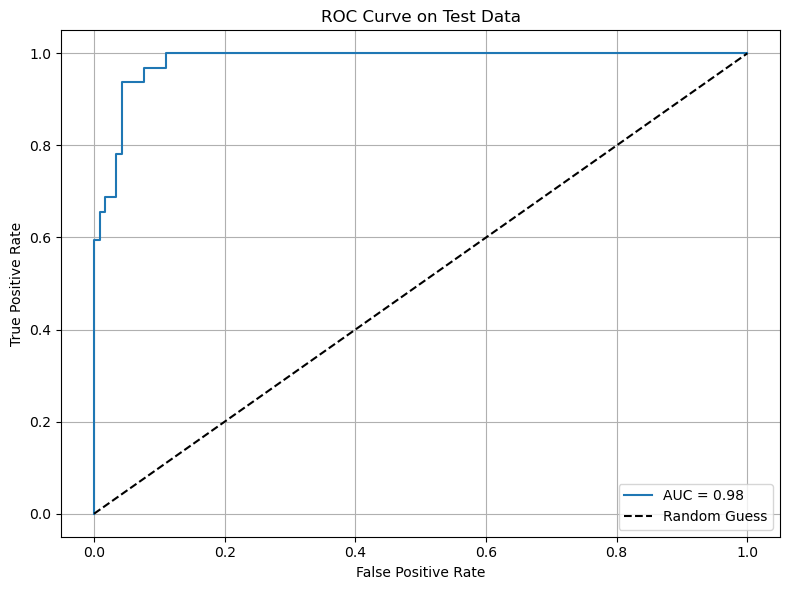

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute FPR, TPR
fpr, tpr, thresholds = roc_curve(test_data['High_Risk_Flag'], test_data['Predicted_Risk_Score'])

# Plot ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(test_data['High_Risk_Flag'], test_data['Predicted_Risk_Score']):.2f}")
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on Test Data')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Dynamic Recovery Strategy based on Risk Scores:


In [36]:
# Set display options:
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns',None)

In [37]:
# Create dynamic recovery strategy based on predicted risk scores
def assign_recovery_strategy(risk_score):
    if risk_score > 0.75:
        return ("⚠️ High Risk: Initiate legal proceedings with asset seizure notices, "
                "escalate to external recovery agencies, and enforce loan recovery under default clauses.")
    
    elif 0.50 <= risk_score <= 0.75:
        return ("⚠️ Moderate Risk: Offer structured settlements with penal interest adjustments, "
                "negotiate revised EMI plans, and initiate soft legal notices.")
    
    else:
        return ("✅ Low Risk: Send automated payment reminders, schedule regular financial health reviews, "
                "and maintain active borrower engagement for early warnings.")

# Apply to test data
test_data['Recovery_Strategy'] = test_data['Predicted_Risk_Score'].apply(assign_recovery_strategy)

# Preview top rows
test_data[['Predicted_Risk_Score', 'Predicted_High_Risk', 'Recovery_Strategy']].head()

,Predicted_Risk_Score,Predicted_High_Risk,Recovery_Strategy
361,0.039187,0,"✅ Low Risk: Send automated payment reminders, schedule regular financial health reviews, and maintain active borrower engagement for early warnings."
73,0.000387,0,"✅ Low Risk: Send automated payment reminders, schedule regular financial health reviews, and maintain active borrower engagement for early warnings."
374,0.000129,0,"✅ Low Risk: Send automated payment reminders, schedule regular financial health reviews, and maintain active borrower engagement for early warnings."
155,0.993621,1,"⚠️ High Risk: Initiate legal proceedings with asset seizure notices, escalate to external recovery agencies, and enforce loan recovery under default clauses."
104,0.986704,1,"⚠️ High Risk: Initiate legal proceedings with asset seizure notices, escalate to external recovery agencies, and enforce loan recovery under default clauses."


# Testing on two different sets of Unseen Data:

In [38]:
# Preview the Test Data:
test_data.head(5)

,Age,Monthly_Income,Num_Dependents,Loan_Tenure,Interest_Rate,Outstanding_Loan_Amount,Collection_Attempts,EMI_to_Income_Ratio,Collateral_Coverage,Default_Severity,Borrower_Segment,Segment_Name,High_Risk_Flag,Predicted_Risk_Score,Predicted_High_Risk,Recovery_Strategy
361,55,141888,0,72,17.81,1.475467e+06,2,0.144428,0.913107,234,1,"Affluent, Low Risk Borrowers",0,0.039187,0,"✅ Low Risk: Send automated payment reminders, schedule regular financial health reviews, and maintain active borrower engagement for early warnings."
73,28,79178,3,72,6.39,3.812657e+05,3,0.066879,0.000000,14,1,"Affluent, Low Risk Borrowers",0,0.000387,0,"✅ Low Risk: Send automated payment reminders, schedule regular financial health reviews, and maintain active borrower engagement for early warnings."
374,35,237374,0,36,12.84,6.279152e+05,0,0.073479,1.225287,0,3,"Secured, Moderate Risk Borrowers",0,0.000129,0,"✅ Low Risk: Send automated payment reminders, schedule regular financial health reviews, and maintain active borrower engagement for early warnings."
155,22,133516,3,24,7.66,1.374051e+06,2,0.428803,0.000000,166,0,"Low Income, High EMI Burden Borrowers",1,0.993621,1,"⚠️ High Risk: Initiate legal proceedings with asset seizure notices, escalate to external recovery agencies, and enforce loan recovery under default clauses."
104,61,150542,2,12,15.14,1.015521e+06,10,0.562147,0.000000,441,0,"Low Income, High EMI Burden Borrowers",1,0.986704,1,"⚠️ High Risk: Initiate legal proceedings with asset seizure notices, escalate to external recovery agencies, and enforce loan recovery under default clauses."


In [39]:
import pandas as pd

high_risk_sample = pd.DataFrame([{
    'Age': 24,  # Young age, less financial maturity
    'Monthly_Income': 18000,  # Very low income
    'Num_Dependents': 3,  # High family burden
    'Loan_Tenure': 72,  # Long tenure
    'Interest_Rate': 16.8,  # High interest rate
    'Outstanding_Loan_Amount': 1560000,  # Almost full loan pending
    'Collection_Attempts': 3,  # Recovery team involved
    'EMI_to_Income_Ratio': 1.125,  # More EMI than income
    'Collateral_Coverage': 0.0,  # No assets
    'Default_Severity': 300  # Heavy default behavior
}])


low_risk_sample = pd.DataFrame([{
    'Age': 42,  # Financially mature borrower
    'Monthly_Income': 250000,  # Very high, stable income
    'Num_Dependents': 1,  # Low family burden
    'Loan_Tenure': 36,  # Reasonable tenure
    'Interest_Rate': 9.2,  # Normal rate
    'Outstanding_Loan_Amount': 300000,  # Majority repaid
    'Collection_Attempts': 0,  # Never chased
    'EMI_to_Income_Ratio': 0.048,  # Very low stress
    'Collateral_Coverage': 3.75,  # Collateral 3.75x of remaining loan
    'Default_Severity': 0  # No default history
}])


In [40]:
high_risk_sample['Predicted_Risk_Score'] = xgb.predict_proba(high_risk_sample[features])[:, 1]
low_risk_sample['Predicted_Risk_Score'] = xgb.predict_proba(low_risk_sample[features])[:, 1]

# Apply dynamic recovery strategy
high_risk_sample['Recovery_Strategy'] = high_risk_sample['Predicted_Risk_Score'].apply(assign_recovery_strategy)
low_risk_sample['Recovery_Strategy'] = low_risk_sample['Predicted_Risk_Score'].apply(assign_recovery_strategy)

# View results in clean format
print("🔴 High Risk Default - Borrower")
print(f"Risk Score: {high_risk_sample['Predicted_Risk_Score'].iloc[0]:.4f}")
print(f"Recovery Strategy:\n{high_risk_sample['Recovery_Strategy'].iloc[0]}")

print("\n🟢 Low Risk Default - Borrower")
print(f"Risk Score: {low_risk_sample['Predicted_Risk_Score'].iloc[0]:.4f}")
print(f"Recovery Strategy:\n{low_risk_sample['Recovery_Strategy'].iloc[0]}")

🔴 High Risk Default - Borrower
Risk Score: 0.7633
Recovery Strategy:
⚠️ High Risk: Initiate legal proceedings with asset seizure notices, escalate to external recovery agencies, and enforce loan recovery under default clauses.

🟢 Low Risk Default - Borrower
Risk Score: 0.0002
Recovery Strategy:
✅ Low Risk: Send automated payment reminders, schedule regular financial health reviews, and maintain active borrower engagement for early warnings.


# For Deployment Purposes:


In [41]:
# Train Data:
train_data.head(5)

,Age,Monthly_Income,Num_Dependents,Loan_Tenure,Interest_Rate,Outstanding_Loan_Amount,Collection_Attempts,EMI_to_Income_Ratio,Collateral_Coverage,Default_Severity,Borrower_Segment,Segment_Name,High_Risk_Flag
5,41,238224,3,36,15.86,129965.525042,6,0.015154,1.477590,111,3,"Secured, Moderate Risk Borrowers",0
116,64,249614,0,72,7.90,680411.848349,1,0.037859,0.581164,0,1,"Affluent, Low Risk Borrowers",0
45,29,24847,0,72,7.58,319736.833397,7,0.178725,1.353242,0,3,"Secured, Moderate Risk Borrowers",0
16,42,133154,3,24,8.82,703320.021156,3,0.220084,0.671596,513,2,"High Income, High Default Risk Borrowers",1
462,44,211133,2,12,17.02,541900.377300,3,0.213886,1.053559,680,2,"High Income, High Default Risk Borrowers",1


In [42]:
# Test Data:
test_data.head(5)

,Age,Monthly_Income,Num_Dependents,Loan_Tenure,Interest_Rate,Outstanding_Loan_Amount,Collection_Attempts,EMI_to_Income_Ratio,Collateral_Coverage,Default_Severity,Borrower_Segment,Segment_Name,High_Risk_Flag,Predicted_Risk_Score,Predicted_High_Risk,Recovery_Strategy
361,55,141888,0,72,17.81,1.475467e+06,2,0.144428,0.913107,234,1,"Affluent, Low Risk Borrowers",0,0.039187,0,"✅ Low Risk: Send automated payment reminders, schedule regular financial health reviews, and maintain active borrower engagement for early warnings."
73,28,79178,3,72,6.39,3.812657e+05,3,0.066879,0.000000,14,1,"Affluent, Low Risk Borrowers",0,0.000387,0,"✅ Low Risk: Send automated payment reminders, schedule regular financial health reviews, and maintain active borrower engagement for early warnings."
374,35,237374,0,36,12.84,6.279152e+05,0,0.073479,1.225287,0,3,"Secured, Moderate Risk Borrowers",0,0.000129,0,"✅ Low Risk: Send automated payment reminders, schedule regular financial health reviews, and maintain active borrower engagement for early warnings."
155,22,133516,3,24,7.66,1.374051e+06,2,0.428803,0.000000,166,0,"Low Income, High EMI Burden Borrowers",1,0.993621,1,"⚠️ High Risk: Initiate legal proceedings with asset seizure notices, escalate to external recovery agencies, and enforce loan recovery under default clauses."
104,61,150542,2,12,15.14,1.015521e+06,10,0.562147,0.000000,441,0,"Low Income, High EMI Burden Borrowers",1,0.986704,1,"⚠️ High Risk: Initiate legal proceedings with asset seizure notices, escalate to external recovery agencies, and enforce loan recovery under default clauses."


In [43]:
# Create a new merged DataFrame and save as reference_data.pkl

reference_data = pd.concat([train_data, test_data], ignore_index=True)
reference_data.to_pickle("reference_data.pkl")
reference_data.to_csv("reference_data.csv")

print(f"Saved the final dataset: {reference_data.shape}")

Saved the final dataset: (500, 16)


In [44]:
# Save the Trained Model:
import pickle

with open('xgb.pkl', 'wb') as f:
    pickle.dump(xgb, f)

print("Trained Model Saved Successfully!")

Trained Model Saved Successfully!


In [45]:
# Save Scaler:

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Scalar was saved!")

Scalar was saved!


In [46]:
import pickle

# Save the correct features list
features = [
    'Age',
    'Monthly_Income',
    'Num_Dependents',
    'Loan_Tenure',
    'Interest_Rate',
    'Outstanding_Loan_Amount',
    'Collection_Attempts',
    'EMI_to_Income_Ratio',
    'Collateral_Coverage',
    'Default_Severity'
]

with open('features.pkl', 'wb') as f:
    pickle.dump(features, f)

print("Final Feature List Saved! Model is ready for deployment.")

Final Feature List Saved! Model is ready for deployment.


In [47]:
import pickle

# Save the trained KMeans model
with open('kmeans.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

print("KMeans model saved! Segmentation ready for production.")

KMeans model saved! Segmentation ready for production.


In [48]:
# Save Segment Mapping:

segment_mapping = {
    0: 'Low Income, High EMI Burden Borrowers',
    1: 'Affluent, Low Risk Borrowers',
    2: 'High Income, High Default Risk Borrowers',
    3: 'Secured, Moderate Risk Borrowers'
}

import pickle

# Save final segment mapping
with open('segment_names.pkl', 'wb') as f:
    pickle.dump(segment_mapping, f)

print("Final Segment Mapping Saved! Correct borrower profiles are now locked in.")

Final Segment Mapping Saved! Correct borrower profiles are now locked in.


---

### Tuning the Model and Testing the Model

In [49]:
# Train and test a RandomForest model, then compare with XGBoost results
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import pandas as pd
import numpy as np

# Use the same features and splits as XGBoost
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Validation set predictions
y_pred_rf = rf.predict(X_valid)
y_proba_rf = rf.predict_proba(X_valid)[:, 1]

print("RandomForest Validation Results:")
print(confusion_matrix(y_valid, y_pred_rf))
print(classification_report(y_valid, y_pred_rf))
print(f"ROC AUC: {roc_auc_score(y_valid, y_proba_rf):.4f}\n")

# Test set predictions
test_data['Predicted_High_Risk_RF'] = rf.predict(test_data[features])
test_data['Predicted_Risk_Score_RF'] = rf.predict_proba(test_data[features])[:, 1]

print("RandomForest Test Results:")
print(confusion_matrix(test_data['High_Risk_Flag'], test_data['Predicted_High_Risk_RF']))
print(classification_report(test_data['High_Risk_Flag'], test_data['Predicted_High_Risk_RF']))
print(f"ROC AUC: {roc_auc_score(test_data['High_Risk_Flag'], test_data['Predicted_Risk_Score_RF']):.4f}\n")

# XGBoost Test Results for comparison
print("XGBoost Test Results (for comparison):")
print(confusion_matrix(test_data['High_Risk_Flag'], test_data['Predicted_High_Risk']))
print(classification_report(test_data['High_Risk_Flag'], test_data['Predicted_High_Risk']))
print(f"ROC AUC: {roc_auc_score(test_data['High_Risk_Flag'], test_data['Predicted_Risk_Score']):.4f}")

RandomForest Validation Results:
[[49  4]
 [ 4 13]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        53
           1       0.76      0.76      0.76        17

    accuracy                           0.89        70
   macro avg       0.84      0.84      0.84        70
weighted avg       0.89      0.89      0.89        70

ROC AUC: 0.9667

RandomForest Test Results:
[[112   6]
 [  6  26]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       118
           1       0.81      0.81      0.81        32

    accuracy                           0.92       150
   macro avg       0.88      0.88      0.88       150
weighted avg       0.92      0.92      0.92       150

ROC AUC: 0.9791

XGBoost Test Results (for comparison):
[[113   5]
 [  2  30]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       118
           1       0.86      0.94      

In [50]:
# Hyperparameter tuning for RandomForest and XGBoost, comparison, and sample test cases
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import numpy as np

# Define parameter grids
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# RandomForest tuning
rf_base = RandomForestClassifier(random_state=42)
rf_search = RandomizedSearchCV(rf_base, rf_param_grid, n_iter=10, scoring='roc_auc', cv=cv, n_jobs=-1, verbose=1, random_state=42)
rf_search.fit(X_train, y_train)
best_rf = rf_search.best_estimator_

# XGBoost tuning
xgb_base = XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False)
xgb_search = RandomizedSearchCV(xgb_base, xgb_param_grid, n_iter=10, scoring='roc_auc', cv=cv, n_jobs=-1, verbose=1, random_state=42)
xgb_search.fit(X_train, y_train)
best_xgb = xgb_search.best_estimator_

# Validation set evaluation
y_pred_rf = best_rf.predict(X_valid)
y_proba_rf = best_rf.predict_proba(X_valid)[:, 1]
y_pred_xgb = best_xgb.predict(X_valid)
y_proba_xgb = best_xgb.predict_proba(X_valid)[:, 1]

print('RandomForest (Tuned) Validation Results:')
print(confusion_matrix(y_valid, y_pred_rf))
print(classification_report(y_valid, y_pred_rf))
print(f'ROC AUC: {roc_auc_score(y_valid, y_proba_rf):.4f}\n')

print('XGBoost (Tuned) Validation Results:')
print(confusion_matrix(y_valid, y_pred_xgb))
print(classification_report(y_valid, y_pred_xgb))
print(f'ROC AUC: {roc_auc_score(y_valid, y_proba_xgb):.4f}\n')

# Test set evaluation
test_data['Predicted_High_Risk_RF_Tuned'] = best_rf.predict(test_data[features])
test_data['Predicted_Risk_Score_RF_Tuned'] = best_rf.predict_proba(test_data[features])[:, 1]
test_data['Predicted_High_Risk_XGB_Tuned'] = best_xgb.predict(test_data[features])
test_data['Predicted_Risk_Score_XGB_Tuned'] = best_xgb.predict_proba(test_data[features])[:, 1]

print('RandomForest (Tuned) Test Results:')
print(confusion_matrix(test_data['High_Risk_Flag'], test_data['Predicted_High_Risk_RF_Tuned']))
print(classification_report(test_data['High_Risk_Flag'], test_data['Predicted_High_Risk_RF_Tuned']))
print(f'ROC AUC: {roc_auc_score(test_data['High_Risk_Flag'], test_data['Predicted_Risk_Score_RF_Tuned']):.4f}\n')

print('XGBoost (Tuned) Test Results:')
print(confusion_matrix(test_data['High_Risk_Flag'], test_data['Predicted_High_Risk_XGB_Tuned']))
print(classification_report(test_data['High_Risk_Flag'], test_data['Predicted_High_Risk_XGB_Tuned']))
print(f'ROC AUC: {roc_auc_score(test_data['High_Risk_Flag'], test_data['Predicted_Risk_Score_XGB_Tuned']):.4f}\n')

# Select best model based on test ROC AUC
rf_auc = roc_auc_score(test_data['High_Risk_Flag'], test_data['Predicted_Risk_Score_RF_Tuned'])
xgb_auc = roc_auc_score(test_data['High_Risk_Flag'], test_data['Predicted_Risk_Score_XGB_Tuned'])
if xgb_auc >= rf_auc:
    best_model = best_xgb
    best_model_name = 'XGBoost (Tuned)'
    test_data['Best_Predicted_Risk_Score'] = test_data['Predicted_Risk_Score_XGB_Tuned']
else:
    best_model = best_rf
    best_model_name = 'RandomForest (Tuned)'
    test_data['Best_Predicted_Risk_Score'] = test_data['Predicted_Risk_Score_RF_Tuned']

print(f'\nSelected Best Model: {best_model_name} (AUC={max(xgb_auc, rf_auc):.4f})')

# Define strategy assignment function (reuse if already defined)
def assign_recovery_strategy(risk_score):
    if risk_score > 0.75:
        return ("⚠️ High Risk: Initiate legal proceedings with asset seizure notices, "
                "escalate to external recovery agencies, and enforce loan recovery under default clauses.")
    elif 0.50 <= risk_score <= 0.75:
        return ("⚠️ Moderate Risk: Offer structured settlements with penal interest adjustments, "
                "negotiate revised EMI plans, and initiate soft legal notices.")
    else:
        return ("✅ Low Risk: Send automated payment reminders, schedule regular financial health reviews, "
                "and maintain active borrower engagement for early warnings.")

# Sample test cases for all three risk types
sample_cases = pd.DataFrame([
    { # High risk
        'Age': 24, 'Monthly_Income': 18000, 'Num_Dependents': 3, 'Loan_Tenure': 72, 'Interest_Rate': 16.8,
        'Outstanding_Loan_Amount': 1560000, 'Collection_Attempts': 3, 'EMI_to_Income_Ratio': 1.125, 'Collateral_Coverage': 0.0, 'Default_Severity': 300
    },
    { # Moderate risk
        'Age': 35, 'Monthly_Income': 60000, 'Num_Dependents': 2, 'Loan_Tenure': 48, 'Interest_Rate': 12.0,
        'Outstanding_Loan_Amount': 500000, 'Collection_Attempts': 2, 'EMI_to_Income_Ratio': 0.55, 'Collateral_Coverage': 0.8, 'Default_Severity': 120
    },
    { # Low risk
        'Age': 42, 'Monthly_Income': 250000, 'Num_Dependents': 1, 'Loan_Tenure': 36, 'Interest_Rate': 9.2,
        'Outstanding_Loan_Amount': 300000, 'Collection_Attempts': 0, 'EMI_to_Income_Ratio': 0.048, 'Collateral_Coverage': 3.75, 'Default_Severity': 0
    }
])

sample_cases['Predicted_Risk_Score'] = best_model.predict_proba(sample_cases[features])[:, 1]
sample_cases['Recovery_Strategy'] = sample_cases['Predicted_Risk_Score'].apply(assign_recovery_strategy)

print('\nSample Test Cases:')
for i, row in sample_cases.iterrows():
    print(f"\nCase {i+1}:")
    print(f"Risk Score: {row['Predicted_Risk_Score']:.4f}")
    print(f"Strategy: {row['Recovery_Strategy']}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits


c:\Users\USER\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning:

[15:05:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




RandomForest (Tuned) Validation Results:
[[50  3]
 [ 5 12]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.93        53
           1       0.80      0.71      0.75        17

    accuracy                           0.89        70
   macro avg       0.85      0.82      0.84        70
weighted avg       0.88      0.89      0.88        70

ROC AUC: 0.9612

XGBoost (Tuned) Validation Results:
[[48  5]
 [ 1 16]]
              precision    recall  f1-score   support

           0       0.98      0.91      0.94        53
           1       0.76      0.94      0.84        17

    accuracy                           0.91        70
   macro avg       0.87      0.92      0.89        70
weighted avg       0.93      0.91      0.92        70

ROC AUC: 0.9700

RandomForest (Tuned) Test Results:
[[113   5]
 [  6  26]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       118
           1       0.84      0

In [51]:
# Save the selected best model if it is XGBoost (Tuned)
import pickle
if best_model_name == 'XGBoost (Tuned)':
    with open('xgb_tuned.pkl', 'wb') as f:
        pickle.dump(best_model, f)
    print('XGBoost (Tuned) model saved as xgb_tuned.pkl')
else:
    print('Best model is not XGBoost (Tuned), not saving.')

XGBoost (Tuned) model saved as xgb_tuned.pkl
